# Getting the data ready for merger
In this section, the columns are filtered and duplicates are removed, preparing the data for merging with the other teammates' datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.tokenize import *
import seaborn as sns
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from imblearn.over_sampling import RandomOverSampler
import re
from bs4 import BeautifulSoup
from nltk.util import ngrams
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
import spacy
from langdetect import detect
from nltk.corpus import words
from spellchecker import SpellChecker
import nltk
import contractions
import numpy as np

In [2]:
data = pd.read_csv('raw_scraped_date_junming.csv')

In [3]:
data

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,airline_name
0,Not Verified,NaN,Couple Leisure,Economy Class,Vancouver to Cancun,January 2024,2.0,3.0,2.0,3.0,1.0,2.0,2,no,1,Both my connecting flights from Mexico City t...,Aeromexico
1,✅ Trip Verified,Boeing 737 Max,Couple Leisure,Economy Class,Mexico City to Vancouver,January 2024,3.0,4.0,3.0,1.0,3.0,3.0,2,no,6,Uneventful flight on new years. Check in coul...,Aeromexico
2,✅ Trip Verified,Boeing 737-8 MAX,Couple Leisure,Economy Class,Mexico City to Toronto,December 2023,3.0,4.0,4.0,3.0,NaN,4.0,4,yes,8,Of all the North American carriers I have flo...,Aeromexico
3,✅ Trip Verified,Embraer 190,Couple Leisure,Economy Class,Queretaro to Mexico City,December 2023,3.0,4.0,NaN,NaN,NaN,4.0,3,yes,8,"What a pleasurable, although very short flig...",Aeromexico
4,✅ Trip Verified,Boeing 787,Solo Leisure,Economy Class,London to Mexico city,January 2024,3.0,1.0,1.0,4.0,1.0,4.0,2,no,5,Everything was just average. The ground staf...,Aeromexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,✅ Trip Verified,Boeing 737 max 8,Business,Economy Class,Calgary to Hamilton,January 2024,3.0,1.0,2.0,1.0,NaN,1.0,1,no,3,Absolute worst staff I have ever had to deal...,WestJet Airlines
1094,✅ Trip Verified,Boeing 737 max 8,Business,Economy Class,Calgary to Hamilton,January 2024,3.0,1.0,2.0,1.0,NaN,1.0,1,no,3,Absolute worst staff I have ever had to deal...,WestJet Airlines
1095,✅ Trip Verified,Boeing 737 max 8,Business,Economy Class,Calgary to Hamilton,January 2024,3.0,1.0,2.0,1.0,NaN,1.0,1,no,3,Absolute worst staff I have ever had to deal...,WestJet Airlines
1096,✅ Trip Verified,Boeing 737 max 8,Business,Economy Class,Calgary to Hamilton,January 2024,3.0,1.0,2.0,1.0,NaN,1.0,1,no,3,Absolute worst staff I have ever had to deal...,WestJet Airlines


In [4]:
filtered_data_merge = data[['status','review','overall_rating','date','airline_name']]
filtered_data_merge

,status,review,overall_rating,date,airline_name
0,Not Verified,Both my connecting flights from Mexico City t...,1,January 2024,Aeromexico
1,✅ Trip Verified,Uneventful flight on new years. Check in coul...,6,January 2024,Aeromexico
2,✅ Trip Verified,Of all the North American carriers I have flo...,8,December 2023,Aeromexico
3,✅ Trip Verified,"What a pleasurable, although very short flig...",8,December 2023,Aeromexico
4,✅ Trip Verified,Everything was just average. The ground staf...,5,January 2024,Aeromexico
...,...,...,...,...,...
1093,✅ Trip Verified,Absolute worst staff I have ever had to deal...,3,January 2024,WestJet Airlines
1094,✅ Trip Verified,Absolute worst staff I have ever had to deal...,3,January 2024,WestJet Airlines
1095,✅ Trip Verified,Absolute worst staff I have ever had to deal...,3,January 2024,WestJet Airlines
1096,✅ Trip Verified,Absolute worst staff I have ever had to deal...,3,January 2024,WestJet Airlines


In [5]:
filtered_data_merge = filtered_data_merge.drop_duplicates()
filtered_data_merge.duplicated().sum()

0

In [6]:
filtered_data_merge['date'] = pd.to_datetime(filtered_data_merge['date'])

C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_23524\850941711.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data_merge['date'] = pd.to_datetime(filtered_data_merge['date'])
C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_23524\850941711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_merge['date'] = pd.to_datetime(filtered_data_merge['date'])


In [7]:
to_merge = filtered_data_merge[['review','overall_rating','date']]
to_merge

,review,overall_rating,date
0,Both my connecting flights from Mexico City t...,1,2024-01-01
1,Uneventful flight on new years. Check in coul...,6,2024-01-01
2,Of all the North American carriers I have flo...,8,2023-12-01
3,"What a pleasurable, although very short flig...",8,2023-12-01
4,Everything was just average. The ground staf...,5,2024-01-01
...,...,...,...
1077,Had a bad pre-flight experience with the air...,1,2022-07-01
1078,I didn't expect anything else or special fro...,10,2022-06-01
1079,I loved the experience flying Vistara. I was...,10,2022-05-01
1080,Absolute worst staff I have ever had to deal...,3,2024-01-01


In [8]:
to_merge.to_csv('raw_to_combine', index=False)

## Data undersatnding
After merging all the data together we split them into training and testing, we read the training in here to underastand the data better.

In [9]:
filtered_data = pd.read_csv('training_data.csv')

In [10]:
filtered_data.duplicated().sum()

0

In [11]:
filtered_data = filtered_data.drop_duplicates()
filtered_data.duplicated().sum()

0

In [12]:
filtered_data

,Unnamed: 0,overall_rating,review_date,review_text,airline_name
0,23743,Rated 1 out of 5 stars,"Monday, September 18, 2023 at 03:29:15 AM",EasyJet sent text at 4.00 am day of flight hom...,easyjet
1,82074,9,December 2023,Its been a few years when I flew a lot in A...,Vistara
2,75513,Rated 5 out of 5 stars,"Wednesday, September 6, 2023 at 01:58:27 AM",Useful,volotea
3,4699,Rated 1 out of 5 stars,"Sunday, September 9, 2018 at 08:37:11 PM",one of the worst experiences with Air France e...,air france
4,26212,Rated 1 out of 5 stars,"Monday, December 23, 2019 at 02:00:19 PM",Not a single star this airlines deserves .I lo...,egyptair
...,...,...,...,...,...
65737,6265,Rated 1 out of 5 stars,"Friday, October 14, 2022 at 06:16:18 AM",Still waiting for my refund due to cancellatio...,air mauritius
65738,54886,Rated 1 out of 5 stars,"Sunday, March 26, 2023 at 12:41:18 AM",Horrible service.\nWhy don't the staff offer f...,ryanair
65739,76820,Rated 5 out of 5 stars,"Tuesday, February 11, 2020 at 04:01:12 AM",Just booked my first trip with WestJet from th...,westjet
65740,860,Rated 1 out of 5 stars,"Saturday, July 3, 2021 at 01:00:09 AM",only getting the 1 star because zero is not an...,aer lingus


To come up with the target column 'NPS_score' we take scores 8 and above as promoters, and bellow as detractors and the rest as  neutral. The format of the data is also not consistent so we have to split the text to get the number for some records and scale up to 10 from 5 for others.

In [13]:
def classify_nps(rating_text):
    rating_text = rating_text.strip()
    if "Rated" in rating_text:
        rating = int(rating_text.split(' ')[1])
        return "Detractor" if rating <= 2 else ("Neutral" if rating == 3 else "Promoter")
    else:
        rating = int(float(rating_text))
        return "Detractor" if rating <= 6 else ("Neutral" if rating <= 8 else "Promoter")
        
print(classify_nps("7"))
print(classify_nps("Rated 4 out of 5 stars"))

filtered_data['NPS_score'] = filtered_data['overall_rating'].apply(classify_nps)


Neutral
Promoter


For the review_date column, we ended up having many different date type as the data was collected from many different websites, each having their own format. Thus the code bellow addresses the 3 different format that the 3 of us teammates have and convert into date type.

In [14]:
# Define functions to parse the three date formats
def parse_date_format1(date_str):
    try:
        return pd.to_datetime(date_str, format="%B %Y")
    except ValueError:
        return None

def parse_date_format2(date_str):
    try:
        return pd.to_datetime(date_str, format="%B %d, %Y")
    except ValueError:
        return None

def parse_date_format3(date_str):
    try:
        return pd.to_datetime(date_str, format="%A, %B %d, %Y at %I:%M:%S %p")
    except ValueError:
        return None

# Apply the parsing functions to the "review_date" column
parsed_dates = filtered_data["review_date"].apply(lambda x: parse_date_format1(x) or parse_date_format2(x) or parse_date_format3(x))

# Replace the "review_date" column with the parsed and standardized dates
filtered_data["review_date"] = parsed_dates

# Display the DataFrame with standardized dates
print(filtered_data)

       Unnamed: 0          overall_rating         review_date  \
0           23743  Rated 1 out of 5 stars 2023-09-18 03:29:15   
1           82074                       9 2023-12-01 00:00:00   
2           75513  Rated 5 out of 5 stars 2023-09-06 01:58:27   
3            4699  Rated 1 out of 5 stars 2018-09-09 20:37:11   
4           26212  Rated 1 out of 5 stars 2019-12-23 14:00:19   
...           ...                     ...                 ...   
65737        6265  Rated 1 out of 5 stars 2022-10-14 06:16:18   
65738       54886  Rated 1 out of 5 stars 2023-03-26 00:41:18   
65739       76820  Rated 5 out of 5 stars 2020-02-11 04:01:12   
65740         860  Rated 1 out of 5 stars 2021-07-03 01:00:09   
65741       15795  Rated 1 out of 5 stars 2021-11-03 20:45:56   

                                             review_text     airline_name  \
0      EasyJet sent text at 4.00 am day of flight hom...          easyjet   
1         Its been a few years when I flew a lot in A...         

Here is a simple bar graph to represent the number of missing (null) value in each of the columns. From below, we cans see that only the airline_name have some missing column.

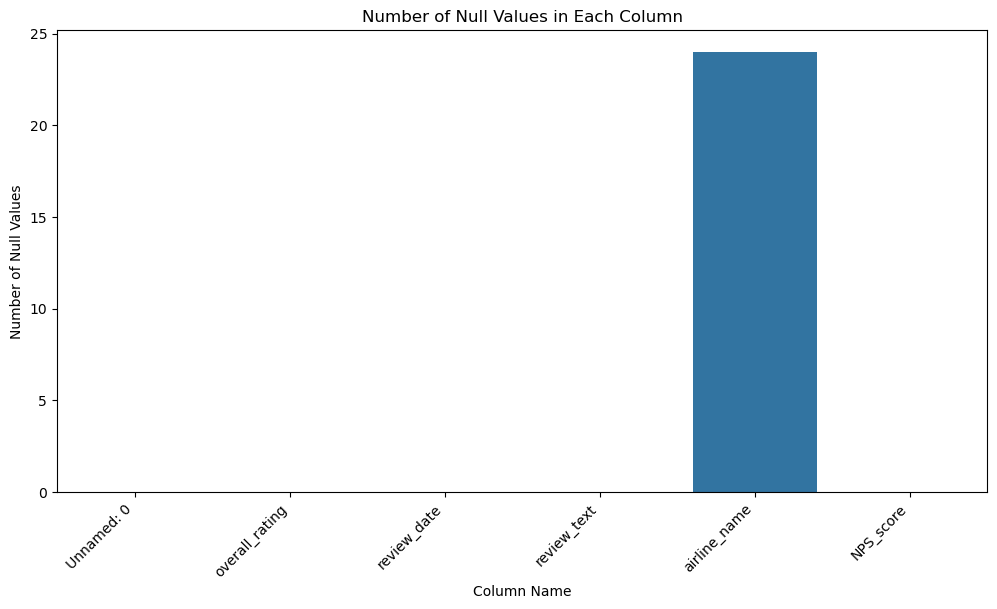

In [15]:
# Count the null values in each column
null_counts = filtered_data.isnull().sum()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Number of Null Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

By taking length of the text data as a measurement, we can plot a box and whiskers graph that shows the outliers in the data. From bellow we can see that there are quite a few records that way outside the interquartile range, these records are known as outliers. Outliers are harmful to our models as they tend to be at the extreme and they cause the model to be unable to generalise the data well enough because of their extremes. Thus affecting the model's performance.

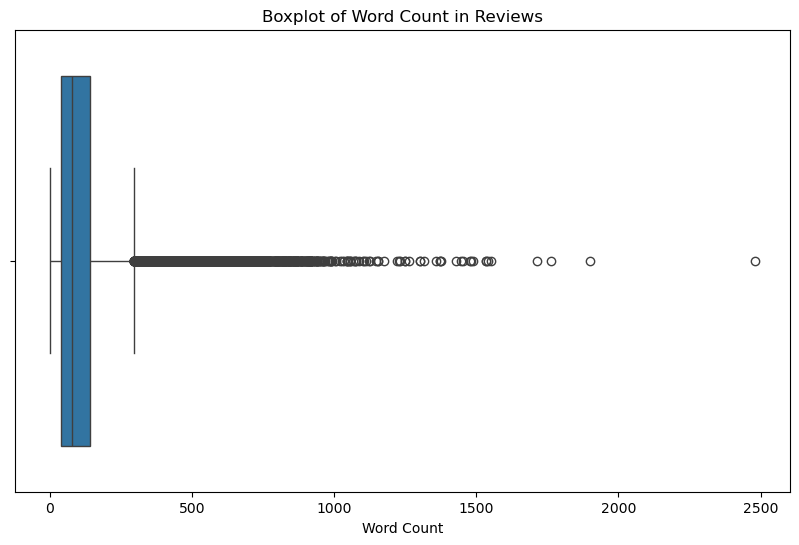

In [16]:
# Create a new column 'word_count' counting the number of words in each review
filtered_data['word_count'] = filtered_data['review_text'].apply(lambda x: len(str(x).split()))

# Plot a box and whiskers diagram for the 'word_count' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['word_count'])
plt.title('Boxplot of Word Count in Reviews')
plt.xlabel('Word Count')
plt.show()

From the bar graph we can tell that the most frequent words tend to be words that carry very little meaning in the context like 'the','and','a'. These words are called stopwords, these words produces noise in model buildin, affecting the model's performace in a negative way. Thus, it is important to treat stopwords in text data. This is important as this will cause the dimensionality of the TFIDF and Count vectoriser bag of words to increase, this could cause the model to take a longer time to load. 

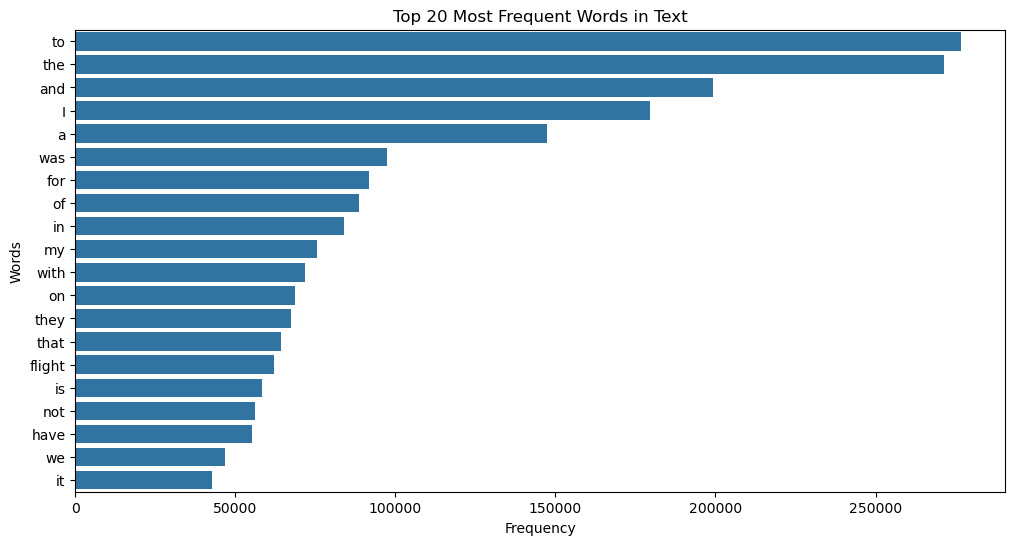

In [17]:
# Tokenize the text and count the frequency of each word
all_words = ' '.join(filtered_data['review_text']).split()
word_counts = Counter(all_words)

# Get the top N most frequent words (adjust as needed)
top_words_count = 20
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_words_count])

# Create a DataFrame with word counts
word_df = pd.DataFrame({'Words': list(top_words.keys()), 'Frequency': list(top_words.values())})

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Words', data=word_df)
plt.title(f'Top {top_words_count} Most Frequent Words in Text')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

We can see that consistently, there are more detractors than promoters over time. Notice there is a spike at 2023 to 2024, this can be because of the airlines trying to get back to normal from covid whcih casued their overall performace to decrease as they are not as used to as before covid.

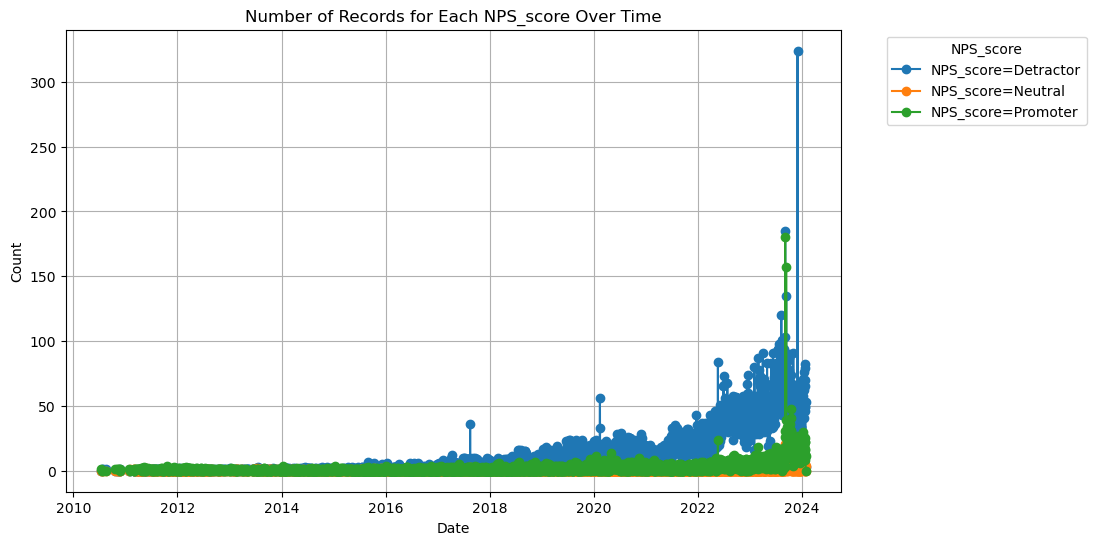

In [18]:
def plot_records_over_time(data, time_column, value_column, legend_column):
    grouped_data_size = data.groupby([pd.Grouper(key=time_column, freq='D'), legend_column]).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(10, 6))

    for column in grouped_data_size.columns:
        ax.plot(grouped_data_size.index, grouped_data_size[column], marker='o', linestyle='-', label=f'{legend_column}={column}')

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=legend_column)

    ax.set_title(f'Number of Records for Each {legend_column} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True)
    plt.show()

    
plot_records_over_time(filtered_data, 'review_date', 'NPS_score', 'NPS_score')


Our target column seems to have a imbalnce of data, there are more detractors than the two other classes combined. Imbalance in the target column classes can lead to a bias model. 

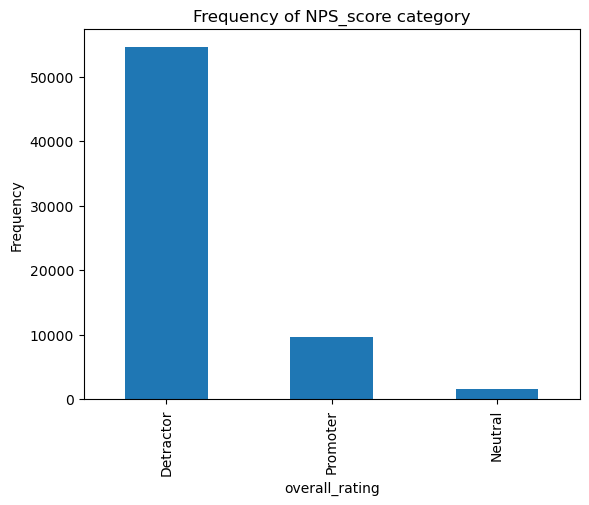

NPS_score
Detractor    54580
Promoter      9607
Neutral       1555
Name: count, dtype: int64


In [19]:
stars = filtered_data['NPS_score'].value_counts()

stars.plot(kind='bar')
plt.title('Frequency of NPS_score category')
plt.xlabel('overall_rating')
plt.ylabel('Frequency')
plt.show()

print(stars)

This visual help us understand the presence of special charcters or html tags in the text. As we can see below, majority of the text contain these special characters. It is important that we deal with these characters as they can affect the model in a negative way by not preoviding any insghtful meaning to the model and at the same time create noise and confuse our models. Thus these characters need to be dealt with.

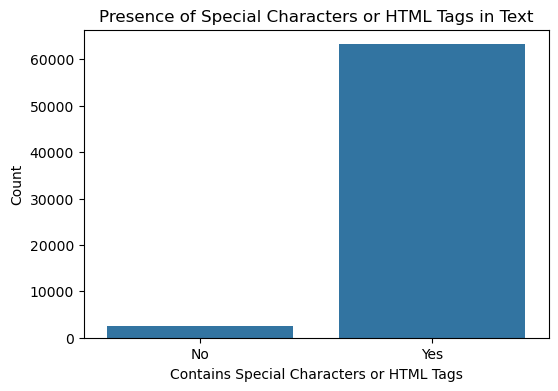

In [20]:
# Create a function to check for special characters or HTML tags
def has_special_characters_or_html(text):
    pattern = r'<[^>]+>|[^a-zA-Z0-9\s]'
    return bool(re.search(pattern, str(text)))

# Apply the function to check for special characters or HTML tags in the 'text' column
filtered_data['has_special_characters_or_html'] = filtered_data['review_text'].apply(has_special_characters_or_html)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='has_special_characters_or_html', data=filtered_data)
plt.title('Presence of Special Characters or HTML Tags in Text')
plt.xlabel('Contains Special Characters or HTML Tags')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

We can see that some of the words here are in english yet they are on the word cloud, this can be due to there being special cheacters in the word casuing them to be there as seen before many of the records are affeted by these special characters. Other than that come words like 're' and 'c' are non english words.

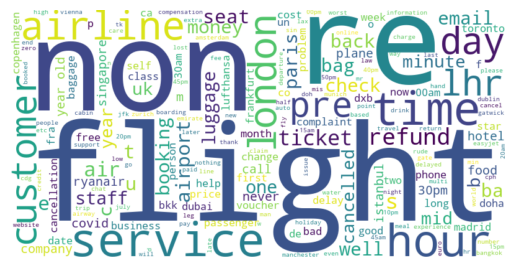

In [21]:
english_words = set(nltk.corpus.words.words())

# Assuming 'overall_rating' contains text data
filtered_data['not_english'] = filtered_data['review_text'].apply(lambda text: word_tokenize(text.lower()))

# Filter out non-English words
filtered_data['not_english'] = filtered_data['not_english'].apply(lambda word_list: [word for word in word_list if word not in english_words])

# Flatten the list of non-English words
unique_not_english = set(word for sublist in filtered_data['not_english'] for word in sublist)

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_not_english))

# Plot WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dealing with punctuation is also important as like stopwords, they do not really provide any information and just increases the dmensionality and create noise for the model. From the graph below, we can see that many of the text data are affected by the presence of the punctuations which has to be dealt with

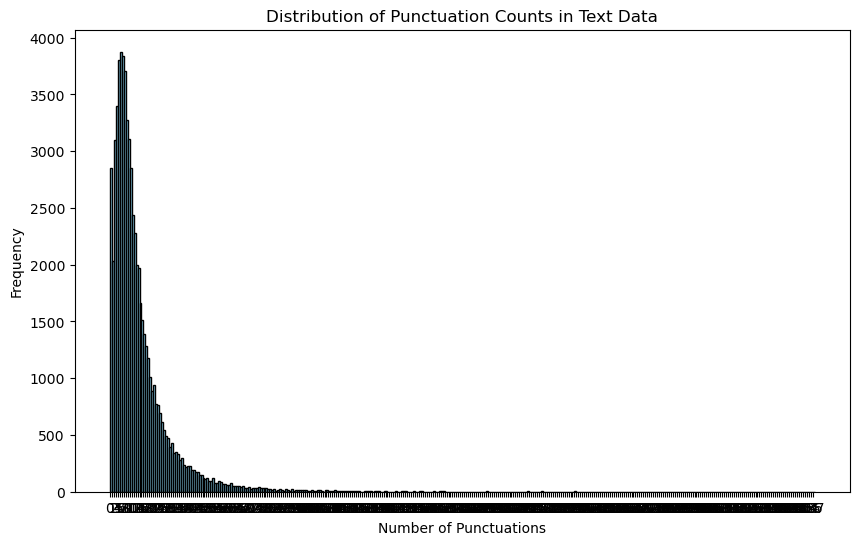

In [22]:
# Assuming 'data' is your DataFrame with a 'text' column
text_data = filtered_data['review_text']

# Function to count punctuation occurrences
def count_punctuations(text):
    return sum(1 for char in text if char in string.punctuation)

# Apply the function to each row in the 'text' column
filtered_data['punctuation_count'] = text_data.apply(count_punctuations)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['punctuation_count'], bins=range(max(filtered_data['punctuation_count']) + 2), color='skyblue', edgecolor='black')
plt.title('Distribution of Punctuation Counts in Text Data')
plt.xlabel('Number of Punctuations')
plt.ylabel('Frequency')
plt.xticks(range(max(filtered_data['punctuation_count']) + 1))

plt.show()

Mixed words are words that consists of both number and letters are shown to be present in the textual data. These words are harmful to the model as they disrupt the linguistic regularities and conventions typically found in natural language and create inconsistencies.

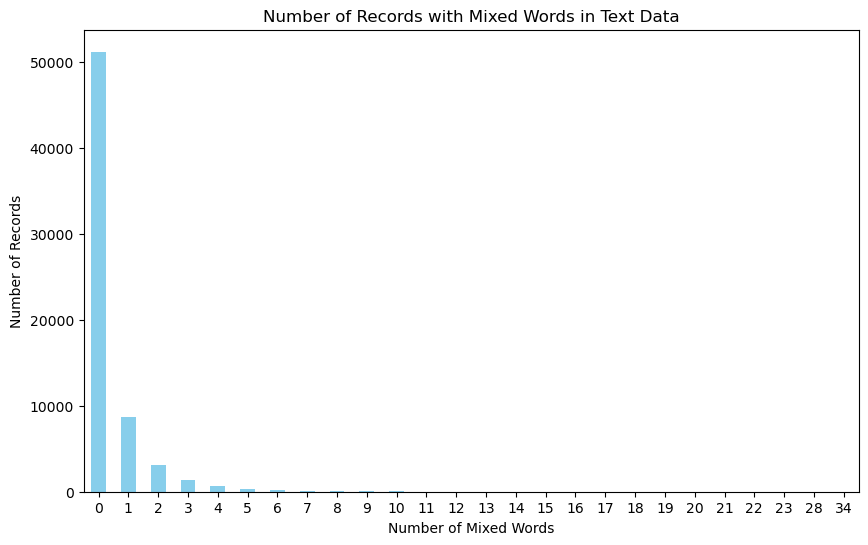

In [23]:
# Assuming 'data' is your DataFrame with a 'text' column
text_data = filtered_data['review_text']

# Function to count mixed words occurrences
def count_mixed_words(text):
    mixed_word_count = sum(1 for word in text.split() if re.search(r'\d', word) and re.search(r'[a-zA-Z]', word))
    return mixed_word_count

# Apply the function to each row in the 'text' column
filtered_data['mixed_word_count'] = text_data.apply(count_mixed_words)

# Count the number of records with mixed words
records_with_mixed_words = filtered_data['mixed_word_count'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
ax = records_with_mixed_words.plot(kind='bar', color='skyblue')
plt.title('Number of Records with Mixed Words in Text Data')
plt.xlabel('Number of Mixed Words')
plt.ylabel('Number of Records')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Data Cleaning
- Removing duplicates (Done above)
- Remove Null values
- Outliers in text data
- Removal of stopwords and punctuations
- Removal of numbers and mixed words (numbers and letters)
- Lower casing
- Tokenize again using n-grams to define the compound words
- Lemmatize

Getting rid of null values

In [24]:
filtered_data.dropna(inplace=True)
filtered_data

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0
...,...,...,...,...,...,...,...,...,...,...,...
65737,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0
65738,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1
65739,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0
65740,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2


Getting rid of outliers

In [25]:
# Create a copy of the DataFrame
data_copy = filtered_data.copy()

# Calculate the IQR for the text length
Q1 = data_copy['review_text'].apply(len).quantile(0.25)
Q3 = data_copy['review_text'].apply(len).quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR to identify outliers
IQR_threshold = 1.5
lower_bound = Q1 - IQR_threshold * IQR
upper_bound = Q3 + IQR_threshold * IQR

# Create a new column 'removed_outliers' based on IQR
data_copy['removed_outliers'] = np.where((data_copy['review_text'].apply(len) >= lower_bound) & (data_copy['review_text'].apply(len) <= upper_bound), data_copy['review_text'], np.nan)

# Drop rows with NaN in the 'removed_outliers' column
data_copy = data_copy.dropna(subset=['removed_outliers'])

# Display the modified DataFrame
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...
...,...,...,...,...,...,...,...,...,...,...,...,...
65737,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...
65738,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...
65739,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...
65740,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...


In [26]:
data_copy = data_copy.reset_index(drop=True)
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...
...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...


Getting rid of special characters

In [27]:
# Define a function to remove everything except lowercase letters, numbers, and spaces using regex
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-z0-9 ]+', '', text)

# Remove non-alphanumeric characters from the 'removed_outliers' column
data_copy['removed_punctuation'] = data_copy['removed_outliers'].apply(remove_non_alphanumeric)


data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...


Ensuring the data is consistent by lowercasing the text data

In [28]:
data_copy['lowercased'] = data_copy['removed_punctuation'].str.lower()
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...,ust booked my first trip with estet from the ...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...


Removing stopwords

In [29]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) - {'not', 'no'}
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stopwords from the 'lowercased' column
data_copy['remove_stopwords'] = data_copy['lowercased'].apply(remove_stopwords)
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased,remove_stopwords
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful,seful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont staff offer free water ...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...,ust booked my first trip with estet from the ...,ust booked first trip estet additional questio...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...,getting 1 star zero not optionthey changing fl...


Removing numbers

In [30]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Remove numbers from the 'filtered_lowercased' column
data_copy['removed_numbers'] = data_copy['remove_stopwords'].apply(remove_numbers)

# Display the modified DataFrame
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased,remove_stopwords,removed_numbers
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful,seful,seful
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...,ust booked my first trip with estet from the ...,ust booked first trip estet additional questio...,ust booked first trip estet additional questio...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ...",3,2,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...,only getting the 1 star because zero is not an...,getting 1 star zero not optionthey changing fl...,getting star zero not optionthey changing fli...


Removing non-english words

In [31]:
def remove_non_english(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase before tokenization
    filtered_tokens = [word for word in tokens if word in english_words]
    return ' '.join(filtered_tokens)

# Remove non-English words from the 'removed_numbers' column
data_copy['english_only'] = data_copy['removed_numbers'].apply(remove_non_english)
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased,remove_stopwords,removed_numbers,english_only
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful,seful,seful,
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...,ust booked my first trip with estet from the ...,ust booked first trip estet additional questio...,ust booked first trip estet additional questio...,ust booked first trip additional team via witt...
61264,860,Rated 1 out of 5 stars,2021-07-03 01:00:09,only getting the 1 star because zero is not an...,aer lingus,Detractor,50,True,"[1, changing, flights, 2nd, ., 7pm, holidays, ..."

Removing mixed words (words that contain both words and numbers)

In [32]:
def removed_mix(text):
    cleaned_text = re.sub(r'\b\w*[0-9]+\w*[a-zA-Z]+\w*\b', '', text)
    return cleaned_text

data_copy['removed_mix'] = data_copy['english_only'].apply(remove_non_english)
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased,remove_stopwords,removed_numbers,english_only,removed_mix
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful,seful,seful,,
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...,dont staff offer free water plane h hot bad ai...
61263,76820,Rated 5 out of 5 stars,2020-02-11 04:01:12,Just booked my first trip with WestJet from th...,westjet,Promoter,65,True,"[westjet, uk, ., questions, contacted, ., ,, ....",7,0,Just booked my first trip with WestJet from th...,ust booked my first trip with estet from the ...,ust booked my first trip with estet from the ...,ust booked first

The following code first finds all the bigrams in the text data then create a count of all of the bigrams. Then take stop top 50 most frequently occuring bigrams and treat them as compound words and tokenize them together. This is to capture some context in the words to better help the model understand the text.

In [33]:
data_copy['bigram'] = data_copy['removed_mix'].apply(lambda x: list(ngrams(word_tokenize(x),2)))
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,mixed_word_count,removed_outliers,removed_punctuation,lowercased,remove_stopwords,removed_numbers,english_only,removed_mix,bigram
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,0,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...,"[(sent, text), (text, day), (day, flight), (fl..."
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,0,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...,"[(flew, lot), (lot, flying), (flying, time), (..."
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,0,Useful,seful,seful,seful,seful,,,[]
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,0,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...,"[(one, worst), (worst, rance), (rance, unhelpf..."
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,0,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...,"[(single, star), (star, lost), (lost, baggage)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,0,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,"[(till, waiting), (waiting, refund), (refund, ..."
61262,54886,Rated 1 out of 5 stars,2023-03-26 00:41:18,Horrible service.\nWhy don't the staff offer f...,ryanair,Detractor,39,True,"[., n't, passengers, delayed, 2.5h, ?, 's, ,, ...",7,1,Horrible service.\nWhy don't the staff offer f...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont the staff offer free wa...,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...,dont staff offer free water plane h hot bad ai...,"[(dont, staff), (staff, offer), (offer, free),..."
61263,76820,Rated 5 out 

In [34]:
from collections import Counter

all_ngrams = [item for sublist in data_copy['bigram'] for item in sublist]

ngram_counts = Counter(all_ngrams)

ngram_list = list(ngram_counts.items())

sorted_ngram_list = sorted(ngram_list, key=lambda x: x[1], reverse=True)

sorted_ngram_list = sorted_ngram_list[0:100]

top_50_bigrams = [bigram[0] for bigram in sorted_ngram_list]

top_50_bigrams

[('customer', 'service'),
 ('return', 'flight'),
 ('could', 'not'),
 ('business', 'class'),
 ('even', 'though'),
 ('no', 'one'),
 ('would', 'not'),
 ('not', 'even'),
 ('never', 'fly'),
 ('money', 'back'),
 ('booked', 'flight'),
 ('flight', 'not'),
 ('get', 'refund'),
 ('next', 'day'),
 ('another', 'flight'),
 ('cabin', 'crew'),
 ('flight', 'no'),
 ('first', 'time'),
 ('flight', 'due'),
 ('never', 'use'),
 ('change', 'flight'),
 ('credit', 'card'),
 ('flight', 'flight'),
 ('worst', 'ever'),
 ('next', 'flight'),
 ('days', 'later'),
 ('not', 'get'),
 ('told', 'us'),
 ('hand', 'luggage'),
 ('not', 'fly'),
 ('trying', 'get'),
 ('still', 'waiting'),
 ('pay', 'extra'),
 ('still', 'not'),
 ('get', 'money'),
 ('dont', 'know'),
 ('dont', 'care'),
 ('hour', 'flight'),
 ('not', 'able'),
 ('hey', 'not'),
 ('cancel', 'flight'),
 ('book', 'flight'),
 ('full', 'refund'),
 ('boarding', 'pass'),
 ('experience', 'ever'),
 ('still', 'no'),
 ('get', 'back'),
 ('service', 'ever'),
 ('customer', 'support'),


In [35]:
compound_words = top_50_bigrams
mwe_tokenizer = MWETokenizer(compound_words, separator='_')
data_copy['tokenized_chunking'] = data_copy['removed_mix'].apply(lambda x: mwe_tokenizer.tokenize(x.split()))
data_copy['tokenized_chunking'][78]

['trying',
 'contact',
 'someone',
 'around',
 'week',
 'regarding',
 'time',
 'sensitive',
 'issue',
 'flight',
 'weekend',
 'reply',
 'told',
 'could_not',
 'help',
 'contact',
 'section',
 'not',
 'see',
 'could',
 'made',
 'error',
 'message',
 'manner',
 'no',
 'reply',
 'since',
 'tried',
 'connect',
 'twitter',
 'still',
 'nothing',
 'multinational',
 'company',
 'flag',
 'carrier',
 'find',
 'unacceptable',
 'already',
 'high',
 'constant',
 'doubt',
 'impact',
 'holiday',
 'need',
 'business',
 'ever',
 'going',
 'ensure',
 'people',
 'feel',
 'book']

Lemmatizing data iis crucial when dealing with textual data as it normalizes words, simplifies feature extraction, and improves model generalization by reducing linguistic variations. Additionally, it creates consistency in vocabulary and enhanced interpretability. Thus, making lemmatization a crucial step for efficient and accurate language modeling.

In [36]:
# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'tokenized_column' column
data_copy['lemmatized_column'] = data_copy['tokenized_chunking'].apply(lemmatize_tokens)
data_copy

,Unnamed: 0,overall_rating,review_date,review_text,airline_name,NPS_score,word_count,has_special_characters_or_html,not_english,punctuation_count,...,removed_outliers,removed_punctuation,lowercased,remove_stopwords,removed_numbers,english_only,removed_mix,bigram,tokenized_chunking,lemmatized_column
0,23743,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,32,True,"[easyjet, 4.00, cancelling, ., organising, ,, ...",6,...,EasyJet sent text at 4.00 am day of flight hom...,asyet sent text at 400 am day of flight home c...,asyet sent text at 400 am day of flight home c...,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...,"[(sent, text), (text, day), (day, flight), (fl...","[sent, text, day, flight, home, rush, round, n...","[sent, text, day, flight, home, rush, round, n..."
1,82074,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,109,True,"[years, asia, ,, india, vistara, :, check-in, ...",20,...,Its been a few years when I flew a lot in A...,ts been a few years when flew a lot in sia s...,ts been a few years when flew a lot in sia s...,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...,"[(flew, lot), (lot, flying), (flying, time), (...","[flew, lot, flying, time, surprise, swift, ser...","[flew, lot, flying, time, surprise, swift, ser..."
2,75513,Rated 5 out of 5 stars,2023-09-06 01:58:27,Useful,volotea,Promoter,1,False,[],0,...,Useful,seful,seful,seful,seful,,,[],[],[]
3,4699,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,30,True,"[experiences, france, .., ,, ,, duties, ., del...",8,...,one of the worst experiences with Air France e...,one of the worst experiences with ir rance eve...,one of the worst experiences with ir rance eve...,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...,"[(one, worst), (worst, rance), (rance, unhelpf...","[one, worst, rance, unhelpful, customer, not, ...","[one, worst, rance, unhelpful, customer, not, ..."
4,26212,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,87,True,"[airlines, deserves, .i, &, 1.5, numbers, &, e...",11,...,Not a single star this airlines deserves .I lo...,ot a single star this airlines deserves lost ...,ot a single star this airlines deserves lost ...,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...,"[(single, star), (star, lost), (lost, baggage)...","[single, star, lost, baggage, last, month, nea...","[single, star, lost, baggage, last, month, nea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61261,6265,Rated 1 out of 5 stars,2022-10-14 06:16:18,Still waiting for my refund due to cancellatio...,air mauritius,Detractor,30,True,"[2, years, ago.not, refunding, clients, money....",3,...,Still waiting for my refund due to cancellatio...,till waiting for my refund due to cancellation...,till waiting for my refund due to cancellation...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,"[(till, waiting), (waiting, refund), (refund, ...","[till, waiting_refund, due, cancellation, flig...","[till, waiting_refund, due, cancellation, flig..."
61262,54886,Rated 1 out of 5 stars,2023-03-

Final data

In [37]:
pre_data = data_copy[['overall_rating','NPS_score','remove_stopwords','removed_numbers','english_only','removed_mix','tokenized_chunking','lemmatized_column']]
pre_data

,overall_rating,NPS_score,remove_stopwords,removed_numbers,english_only,removed_mix,tokenized_chunking,lemmatized_column
0,Rated 1 out of 5 stars,Detractor,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...,"[sent, text, day, flight, home, rush, round, n...","[sent, text, day, flight, home, rush, round, n..."
1,9,Promoter,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...,"[flew, lot, flying, time, surprise, swift, ser...","[flew, lot, flying, time, surprise, swift, ser..."
2,Rated 5 out of 5 stars,Promoter,seful,seful,,,[],[]
3,Rated 1 out of 5 stars,Detractor,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...,"[one, worst, rance, unhelpful, customer, not, ...","[one, worst, rance, unhelpful, customer, not, ..."
4,Rated 1 out of 5 stars,Detractor,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...,"[single, star, lost, baggage, last, month, nea...","[single, star, lost, baggage, last, month, nea..."
...,...,...,...,...,...,...,...,...
61261,Rated 1 out of 5 stars,Detractor,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,"[till, waiting_refund, due, cancellation, flig...","[till, waiting_refund, due, cancellation, flig..."
61262,Rated 1 out of 5 stars,Detractor,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...,dont staff offer free water plane h hot bad ai...,"[dont, staff, offer, free, water, plane, h, ho...","[dont, staff, offer, free, water, plane, h, ho..."
61263,Rated 5 out of 5 stars,Promoter,ust booked first trip estet additional questio...,ust booked first trip estet additional questio...,ust booked first trip additional team via witt...,ust booked first trip additional team via witt...,"[ust, booked, first, trip, additional, team, v...","[ust, booked, first, trip, additional, team, v..."
61264,Rated 1 out of 5 stars,Detractor,getting 1 star zero not optionthey changing fl...,getting star zero not optionthey changing fli...,getting star zero not time sending us losing d...,getting star zero not time sending us losing d...,"[getting, star, zero, not, time, sending, us, ...","[getting, star, zero, not, time, sending, u, l..."


Saving the data

In [38]:
pre_data.to_csv('cleaned_data.csv', index=False)

## Data_preparation
TFidf and count vectoriser done here.

In [39]:
from sklearn.model_selection import train_test_split

# Convert the lists to strings
pre_data['lemmatized_column_str'] = pre_data['lemmatized_column'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pre_data['lemmatized_column_str'],
    pre_data['NPS_score'],
    test_size=0.2,
    random_state=42
)


C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_23524\2235088655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_data['lemmatized_column_str'] = pre_data['lemmatized_column'].apply(lambda x: ' '.join(x))


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the dimensions of the TF-IDF matrices
print("The dimensions of the training set:", X_train_tfidf.shape)
print("The dimensions of the testing set:", X_test_tfidf.shape)

# Print the features
print("The features:\n", tfidf_vectorizer.get_feature_names_out())

# Create DataFrames for the training set
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame for the training set
print("DataFrame for the training set:")
df_train_tfidf

The dimensions of the training set: (49012, 10000)
The dimensions of the testing set: (12254, 10000)
The features:
 ['aa' 'aam' 'aba' ... 'zombie' 'zone' 'zoo']
DataFrame for the training set:


,aa,aam,aba,aback,abandon,abandoned,abandonment,abbreviation,abhorrent,abide,...,yummy,zag,zeal,zebra,zero,zip,zipper,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.240406,0.0,0.0,0.0,0.0,0.0
49008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
49009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
49010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_count = count_vectorizer.transform(X_test)

# Print the shape of the Count matrices
print("Count Matrix Shape - Training:", X_train_count.shape)
print("Count Matrix Shape - Testing:", X_test_count.shape)

# Print the features
print("The features:\n", count_vectorizer.get_feature_names_out())

# Create DataFrames for the training and testing sets
df_train_count = pd.DataFrame(X_train_count.toarray(), columns=count_vectorizer.get_feature_names_out())
df_test_count = pd.DataFrame(X_test_count.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the DataFrame for the training set
print("DataFrame for the training set:")
df_train_count

Count Matrix Shape - Training: (49012, 5000)
Count Matrix Shape - Testing: (12254, 5000)
The features:
 ['aa' 'abandon' 'abandoned' ... 'zip' 'zipper' 'zone']
DataFrame for the training set:


,aa,abandon,abandoned,abhorrent,abide,ability,able,aboard,aborted,abrasive,...,york,youd,young,younger,youve,yr,zero,zip,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
